# Collision Data Project
For the Data Science Capstone in the IBM Coursera course, we've been given data about traffic accidents in Seattle. Let's see what we can do with it.

In [93]:
# Some setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Hello Capstone Course")

df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

Hello Capstone Course


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [86]:
print(df.columns)
df.describe()

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


### The Data
The data consists of nearly 200,000 records, each describing a different traffic accident. Records consist of a "severity code" which indicates whether the accident involved injury (2) or just property damage (1) (By design, other values are possible, such as "no damage" or "death", but these do not appear in our data). They also include various information regarding the circumstances of the accident, such as the location, road and weather conditions, and the type of collision. 

We can see that the mean value for SEVERITYCODE is 1.298901, which means that about 30% of accidents in our data involved injury. Perhaps we can find a way to predict which ones?

#### Extracting Information
We're given the time of the incident, but not in a very useful format. Let's extract some information that's in a regualr enough form to be useful: the day of the week and hour of the day of the event.

In [94]:
import datetime
def day_of_inc(incdttm):
    date = [s for s in incdttm.split(" ") if '/' in s][0]
    #print(date)
    (m, d, y) = date.split('/')
    day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return day_names[datetime.date(int(y), int(m), int(d)).weekday()]
def hour_of_inc(incdttm):
    time = [s for s in incdttm.split(" ") if ':' in s]
    if len(time) == 0:
        return None
    (h,m,s) = time[0].split(':')
    offset = "AM" if "AM" in incdttm else "PM"
    return h + offset
    
days_and_hours = pd.DataFrame({"hour":df["INCDTTM"].apply(hour_of_inc), "day": df["INCDTTM"].apply(day_of_inc)})
df = pd.concat([df, days_and_hours], axis=1)

In [95]:
df[['INCDTTM', 'hour', 'day']]

,INCDTTM,hour,day
0,3/27/2013 2:54:00 PM,2PM,Wednesday
1,12/20/2006 6:55:00 PM,6PM,Wednesday
2,11/18/2004 10:20:00 AM,10AM,Thursday
3,3/29/2013 9:26:00 AM,9AM,Friday
4,1/28/2004 8:04:00 AM,8AM,Wednesday
...,...,...,...
194668,11/12/2018 8:12:00 AM,8AM,Monday
194669,12/18/2018 9:14:00 AM,9AM,Tuesday
194670,1/19/2019 9:25:00 AM,9AM,Saturday
194671,1/15/2019 4:48:00 PM,4PM,Tuesday


#### Filtering by Category
If we filter the dataset for accidents that meet certain criteria, we can learn some things about the liklihoood of injury in different situations. Accidents where a driver was determined to be under the influence of drugs or alcohol had a higher mean severity code, meaning they were more likely than average to involve injury. Perhaps more surprisingly, accidents that happened in daylight were more likely than average to involve injury, while accidents in the dark where street lights were nearby were close to the average.

In [3]:
# The dataset contains two different codes for an accident where a driver was under the influence. 
df_underinfl = df.loc[(df["UNDERINFL"] == '1') | (df['UNDERINFL'] == 'Y')]
df_underinfl.describe()[['SEVERITYCODE']].loc['mean']

SEVERITYCODE    1.390527
Name: mean, dtype: float64

In [4]:
df[['LIGHTCOND']].value_counts()
df_daylight = df.loc[df["LIGHTCOND"] == "Daylight"]
df_daylight.describe()[['SEVERITYCODE']].loc['mean']

SEVERITYCODE    1.331884
Name: mean, dtype: float64

In [5]:
df[['LIGHTCOND']].value_counts()
df_daylight = df.loc[df["LIGHTCOND"] == "Dark - Street Lights On"]
df_daylight.describe()[['SEVERITYCODE']].loc['mean']

SEVERITYCODE    1.298411
Name: mean, dtype: float64

We can visualize the data to gain some intuition about how dangerous certain conditions are compared to one another.

In [97]:
def bar_chart_by_category(column_name, label_name):
    groups = df.groupby(column_name).groups
    groups2 = {'Other' : groups['Other'] if 'Other' in groups else []}

    for k, v in groups.items():
        if len(v) < 500:
            groups2['Other'] = groups['Other'].union(v)
        else:
            groups2[k] = v

    groups = groups2

    mean_by_lightcond = pd.DataFrame([[100 * (df.loc[rows]['SEVERITYCODE'].mean() - 1)] 
                          for rows in groups.values()], index=groups.keys())

    mean_by_lightcond
    ax = mean_by_lightcond.plot(kind='bar', figsize=(10,6), legend=False)

    ax.axhline(29.8, color='red')


    plt.ylabel("Percent resulting in injury")
    plt.title("Percent of accidents resulting in injury by " + label_name)
    plt.annotate("Mean for all accidents", (0,31), color="red")

    plt.show()

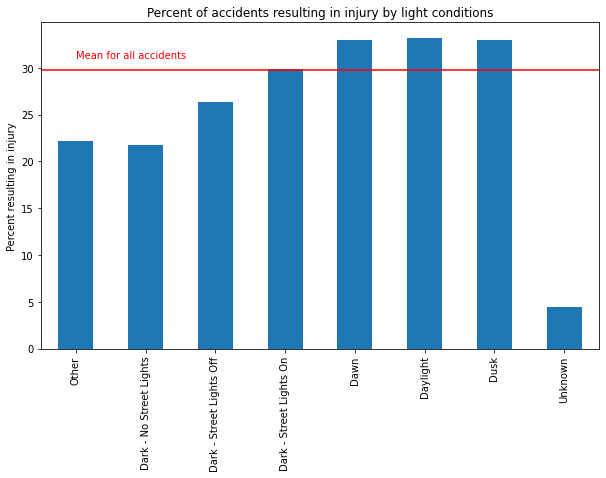

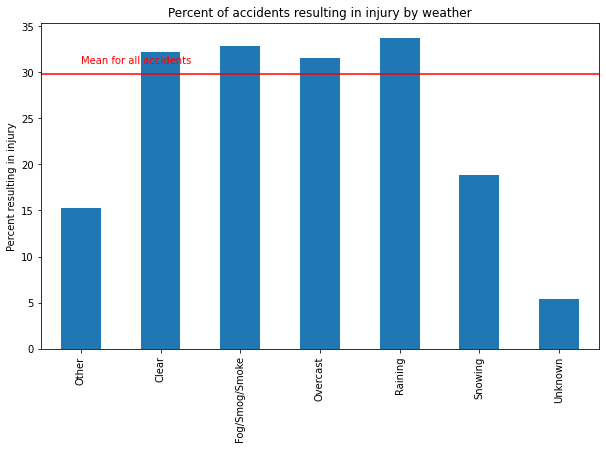

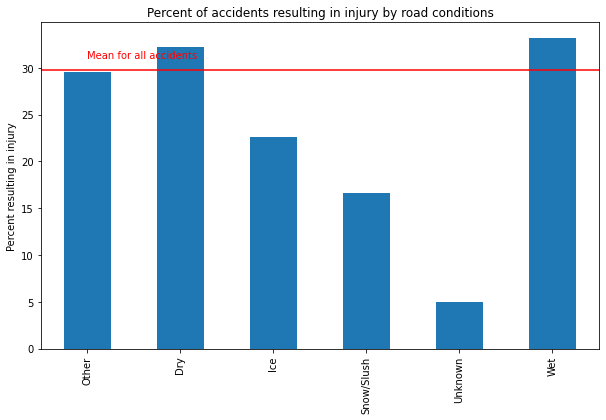

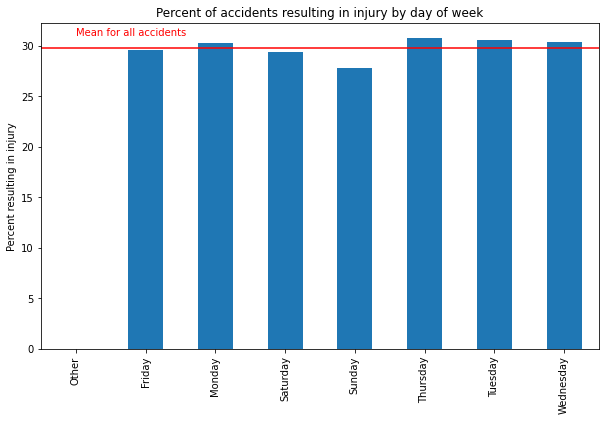

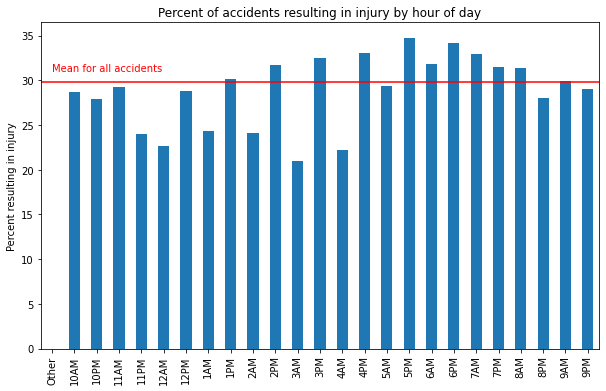

In [99]:
bar_chart_by_category("LIGHTCOND", "light conditions")
bar_chart_by_category("WEATHER", "weather")
bar_chart_by_category("ROADCOND", "road conditions")
bar_chart_by_category("day", "day of week")



#### Modeling the data with machine learning



In [100]:
from sklearn.model_selection import train_test_split

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
feature_df = pd.get_dummies(df[['COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND', 'WEATHER', 
                       'SPEEDING', 'UNDERINFL', 'hour', 'day']], drop_first=True)
feature_df = pd.concat([feature_df, df[['PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT']]], axis=1)


In [112]:
[X_train, X_test, y_train, y_test] = train_test_split(feature_df, df["SEVERITYCODE"], test_size=0.2, random_state=0)

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression())])

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)




0.7564402208809554

In [123]:
from sklearn.metrics import precision_recall_fscore_support

(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, pipe.predict(X_test), 
                                                                       average='binary', pos_label=2)

print("precision: ", precision)
print("recall: ", recall)
print("fscore: ", fscore)


precision:  0.7298109965635738
recall:  0.2923513722791018
fscore:  0.4174703605872596


In [130]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('NN', MLPClassifier(hidden_layer_sizes=(100,)))])

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)


0.746372158726082

In [131]:
from sklearn.metrics import precision_recall_fscore_support

(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, pipe.predict(X_test), 
                                                                       average='binary', pos_label=2)

print("precision: ", precision)
print("recall: ", recall)
print("fscore: ", fscore)

precision:  0.6196932347302109
recall:  0.38931429063064615
fscore:  0.47820343461030385
